In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt

In [3]:
data=np.array([[6.5,25,1],[6.6,24.5,1],[6.9,24.2,1],[7.5,24.5,1],[8.4,24,0],[8.2,24.9,1],[7.5,25,1],[7.2,25.5,1],[7,26.3,1],[7.5,26.2,1],[7.9,26.5,1],[8,26,0],[7.6,25,1],[7,26,1],
      [6.2,24.8,1],[6.6,24,1],[6.7,24,1],[7.1,24.6,1],[8.5,24.1,0],[8.3,24.8,1],[7.9,25.2,1],[7.6,25.8,1],[7.4,26.3,1],[7.5,26.4,1],[7.8,26.2,1],[8.1,25.9,0],[7.5,25.5,1],[7.8,26,1],
      [6.3,25,1],[6.5,24.7,1],[6.7,24.4,1],[7.5,24.1,1],[8.4,24,0],[8.2,24.8,1],[8,25,1],[7.9,25.5,1],[7.3,25.8,1],[7,26.1,1],[7.7,26.2,1],[8.1,26,0],[7.3,25.5,1],[7,25,1],
      [6.6,25,1],[6.7,24.5,1],[6.9,24.2,1],[7.5,23.9,1],[8.5,23.8,0],[8.2,24,1],[7.5,25,1],[7.2,25.5,1],[7.1,26.3,1],[7.4,26.2,1],[7.9,26.2,1],[8.1,26,0],[7.6,25.5,1],[7,25,1],
      [6.7,24.9,1],[6.8,24.4,1],[7,24,1],[7.4,24.4,1],[8.3,24,0],[8.2,24.8,1],[7.4,25.1,1],[7.3,25.4,1],[7.2,26.1,1],[7.3,26.2,1],[8,26.2,1],[8,26.2,0],[7.6,25.7,1],[7.1,24.9,1],
      [6.8,24.9,1],[6.7,24.5,1],[6.9,24.5,1],[7.2,24.4,1],[8.1,24.2,1],[8.4,24,0],[7.2,25,1],[7.4,25.6,1],[7.2,26.2,1],[7.9,26.2,1],[8.1,26,0],[7.9,26,1],[7.5,25.5,1],[7,25,1],
      [6.7,25,1],[6.7,25,1],[6.2,24.5,1],[7.1,24.8,1],[8.3,25.2,1],[8.4,23.9,0],[7.5,25.1,1],[7.1,25.4,1],[7.1,26.3,1],[7.4,26.5,1],[8,26,0],[7.9,25.3,1],[7.3,25,1],[7.2,24.8,1],
      [6.8,25,1],[6.9,24.5,1],[7,24.2,1],[7.2,24.1,1],[7.8,24.1,1],[8.3,23.8,0],[8.1,24.5,1],[7.4,25.5,1],[7.3,26,1],[7.6,26,1],[8.2,25.9,0],[7.1,25.5,1],[7.8,25,1],[7.4,25.2,1],
      [6.9,24.9,1],[6.9,24.4,1],[7.1,24.1,1],[7.2,24.1,1],[7.7,24.1,1],[8.5,24,0],[8.2,24.4,1],[7.3,25,1],[7.3,25.5,1],[7.6,26,1],[8.1,26.1,0],[8.1,25.5,1],[7.8,25.5,1],[7.5,25.5,1]])


In [9]:
X=data[:,0:2]
y=data[:,2]
#print(X,Y)
#print(X.shape,Y.shape)

In [37]:
def linear_confusion_matrix(x,y,x_new,y_new):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(x_train, y_train)
    y_pred = svclassifier.predict(x_test)
    y_new1 = svclassifier.predict(x_new)
    y_new = y_new.reshape(len(y_new),1)
    
    score = f1_score(y_test, y_pred, average="weighted")
    error = np.sum((np.power(y_new-y_new1,2)))/len(y_new)
#    print(confusion_matrix(y_test,y_pred))
#    print(classification_report(y_test,y_pred))
    return score, error

In [38]:
def sigmoid_confusion_matrix(x,y,x_new,y_new):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    svclassifier = SVC(kernel='sigmoid')
    svclassifier.fit(x_train, y_train)
    y_pred = svclassifier.predict(x_test)
    y_new1 = svclassifier.predict(x_new)
    y_new = y_new.reshape(len(y_new),1)
    
    score = f1_score(y_test, y_pred, average="weighted")
    error = np.sum((np.power(y_new-y_new1,2)))/len(y_new)
#    print(confusion_matrix(y_test,y_pred))
#    print(classification_report(y_test,y_pred))
    return score, error

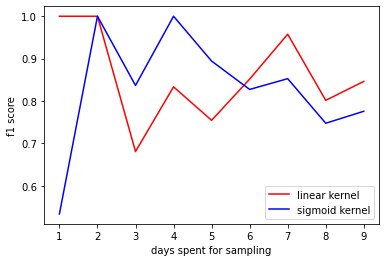

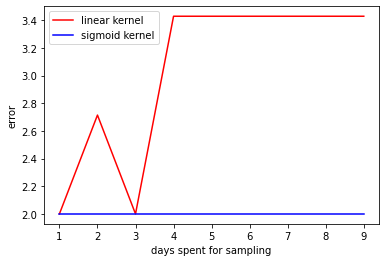

In [45]:
m=(X.shape[0])//14
linear_score=np.zeros(m)
sigmoid_score=np.zeros(m)
linear_error=np.zeros(m)
sigmoid_error=np.zeros(m)
for i in range (0,m):
    k1=14*(i+1)
    x_i=X[0:k1,:]
    y_i=Y[0:k1]
    
    if i<m-1:
        k2=14*(i+2)
        x_new_i=X[k1:k2,:]
        y_new_i=Y[k1:k2]
    
    linear_score[i],linear_error[i]=linear_confusion_matrix(x_i,y_i,x_new_i,y_new_i)
    sigmoid_score[i],sigmoid_error[i]=sigmoid_confusion_matrix(x_i,y_i,x_new_i,y_new_i)
    
days_list=[i+1 for i in range(m)]
days=np.array(days_list) 
f1_linear=linear_score
f1_sigmoid=sigmoid_score

plt.plot(days, f1_linear, color='r', label = "linear kernel")
plt.plot(days, f1_sigmoid, color='b', label = "sigmoid kernel")
plt.legend()
plt.xlabel("days spent for sampling")
plt.ylabel("f1 score")
plt.show()

err_linear=linear_error
err_sigmoid=sigmoid_error

plt.plot(days, err_linear, color='r', label = "linear kernel")
plt.plot(days, err_sigmoid, color='b', label = "sigmoid kernel")
plt.legend()
plt.xlabel("days spent for sampling")
plt.ylabel("error")
plt.show()

In [12]:
from sklearn import metrics
from time import time
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
#Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print("Logistic regression")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
start = time()
lr.fit(X_train,y_train)
end = time()
t1_train_lr = end - start
start = time()
y_pred1_lr = lr.predict(X_test)
end = time()
t1_test_lr = end - start
print(f"Logistic Regression's accuracy with standardisation :                   {metrics.accuracy_score(y_test,y_pred1_lr)*100} %")
print(f"Logistic Regression's precision with standardisation :                  {metrics.precision_score(y_test,y_pred1_lr)*100} %")
print(f"Logistic Regression's recall with standardisation :                     {metrics.recall_score(y_test,y_pred1_lr)*100} %")
print(f"Logistic Regression's f1_score with standardisation :                   {metrics.f1_score(y_test,y_pred1_lr)*100} %")
print(f"Logistic Regression's training time with standardisation :              {t1_train_lr} s")
print(f"Logistic Regression's testing time with standardisation :               {t1_test_lr} s")


print("\nk Nearest Neighbors")
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
start = time()
knn.fit(X_train, y_train)
end = time()
t1_train_knn = end - start
start = time()
y_pred1_knn = knn.predict(X_test)
end = time()
t1_test_knn = end - start
print(f"kNN's accuracy with standardisation :                                   {metrics.accuracy_score(y_test,y_pred1_knn)*100} %")
print(f"kNN's precision with standardisation :                                  {metrics.precision_score(y_test,y_pred1_knn)*100} %")
print(f"kNN's recall with standardisation :                                     {metrics.recall_score(y_test,y_pred1_knn)*100} %")
print(f"kNN's f1_score with standardisation :                                   {metrics.f1_score(y_test,y_pred1_knn)*100} %")
print(f"kNN's training time with standardisation :                              {t1_train_knn} s")
print(f"kNN's testing time with standardisation :                               {t1_test_knn} s")


print("\nDecision Tree")
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
start = time()
tree.fit(X_train, y_train)
end = time()
t1_train_dt = end - start
start = time()
y_pred1_dt = tree.predict(X_test)
end = time()
t1_test_dt = end - start
print(f"Decision Tree's accuracy with standardisation :                         {metrics.accuracy_score(y_test,y_pred1_dt)*100} %")
print(f"Decision Tree's precision with standardisation :                        {metrics.precision_score(y_test,y_pred1_dt)*100} %")
print(f"Decision Tree's recall with standardisation :                           {metrics.recall_score(y_test,y_pred1_dt)*100} %")
print(f"Decision Tree's f1_score with standardisation :                         {metrics.f1_score(y_test,y_pred1_dt)*100} %")
print(f"Decision Tree's training time with standardisation :                    {t1_train_dt} s")
print(f"Decision Tree's testing time with standardisation :                     {t1_test_dt} s")


print("\nRandom Forst")
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()
start = time()
rand_forest.fit(X_train, y_train)
end = time()
t1_train_rf = end - start
start = time()
y_pred1_rf = rand_forest.predict(X_test)
end = time()
t1_test_rf = end - start
print(f"Random Forest's accuracy with standardisation :                         {metrics.accuracy_score(y_test,y_pred1_rf)*100} %")
print(f"Random Forest's precision with standardisation :                        {metrics.precision_score(y_test,y_pred1_rf)*100} %")
print(f"Random Forest's recall with standardisation :                           {metrics.recall_score(y_test,y_pred1_rf)*100} %")
print(f"Random Forest's f1_score with standardisation :                         {metrics.f1_score(y_test,y_pred1_rf)*100} %")
print(f"Random Forest's training time with standardisation :                    {t1_train_rf} s")
print(f"Random Forest's testing time with standardisation :                     {t1_test_rf} s")


print("\nGradient Boosting")
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()
start = time()
gbrt.fit(X_train, y_train)
end = time()
t1_train_gb = end - start
start = time()
y_pred1_gb = gbrt.predict(X_test)
end = time()
t1_test_gb = end - start
print(f"Gradient Boosting's accuracy with standardisation :                     {metrics.accuracy_score(y_test,y_pred1_gb)*100} %")
print(f"Gradient Boosting's precision with standardisation :                    {metrics.precision_score(y_test,y_pred1_gb)*100} %")
print(f"Gradient Boosting's recall with standardisation :                       {metrics.recall_score(y_test,y_pred1_gb)*100} %")
print(f"Gradient Boosting's f1_score with standardisation :                     {metrics.f1_score(y_test,y_pred1_gb)*100} %")
print(f"Gradient Boosting's training time with standardisation :                {t1_train_gb} s")
print(f"Gradient Boosting's testing time with standardisation :                 {t1_test_gb} s")


print("\nSupport Vector Machine")
from sklearn.svm import SVC
svc = SVC()
start = time()
svc.fit(X_train, y_train)
end = time()
t1_train_svm = end - start
start = time()
y_pred1_svm = svc.predict(X_test)
end = time()
t1_test_svm = end - start
print(f"Support Vector Machine's accuracy with standardisation :                {metrics.accuracy_score(y_test,y_pred1_svm)*100} %")
print(f"Support Vector Machine's precision with standardisation :               {metrics.precision_score(y_test,y_pred1_svm)*100} %")
print(f"Support Vector Machine's recall with standardisation :                  {metrics.recall_score(y_test,y_pred1_svm)*100} %")
print(f"Support Vector Machine's f1_score with standardisation :                {metrics.f1_score(y_test,y_pred1_svm)*100} %")
print(f"Support Vector Machine's training time with standardisation :           {t1_train_svm} s")
print(f"Support Vector Machine's testing time with standardisation :            {t1_test_svm} s")


print("\nNeural Network")
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
start = time()
mlp.fit(X_train, y_train)
end = time()
t1_train_nn = end - start
start = time()
y_pred1_nn = mlp.predict(X_test)
end = time()
t1_test_nn = end - start
print(f"Neural Network's accuracy with standardisation :                        {metrics.accuracy_score(y_test,y_pred1_nn)*100} %")
print(f"Neural Network's precision with standardisation :                       {metrics.precision_score(y_test,y_pred1_nn)*100} %")
print(f"Neural Network's recall with standardisation :                          {metrics.recall_score(y_test,y_pred1_nn)*100} %")
print(f"Neural Network's f1_score with standardisation :                        {metrics.f1_score(y_test,y_pred1_nn)*100} %")
print(f"Neural Network's training time with standardisation :                   {t1_train_nn} s")
print(f"Neural Network's testing time with standardisation :                    {t1_test_nn} s")

Logistic regression
Logistic Regression's accuracy with standardisation :                   94.73684210526315 %
Logistic Regression's precision with standardisation :                  94.11764705882352 %
Logistic Regression's recall with standardisation :                     100.0 %
Logistic Regression's f1_score with standardisation :                   96.96969696969697 %
Logistic Regression's training time with standardisation :              0.026928186416625977 s
Logistic Regression's testing time with standardisation :               0.0009968280792236328 s

k Nearest Neighbors
kNN's accuracy with standardisation :                                   94.73684210526315 %
kNN's precision with standardisation :                                  100.0 %
kNN's recall with standardisation :                                     93.75 %
kNN's f1_score with standardisation :                                   96.7741935483871 %
kNN's training time with standardisation :                           

In [ ]:
history = []
days = 9
lr = LogisticRegression()

def run(X_train, y_train, X_test, y_test):
    lr.fit(X_train,y_train)
    y_pred_lr = lr.predict(X_test)

for i in range(days):
    results = run()